## Necessary imports

In [1]:
from statsbombpy import sb
import pandas as pd
import numpy as np
import joblib
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# mpl soccer imports
from mplsoccer import Pitch, VerticalPitch, Sbopen, FontManager
from mplsoccer.dimensions import center_scale_dims
from mplsoccer.utils import FontManager


import plotly.graph_objects as go
from PIL import Image
import io


import json
import streamlit as st

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import FunctionTransformer

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
# Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

import os
import sys
sys.path.append(os.path.abspath("../src"))

from preprocessing_utils import clean_categories
import requests
from pandas import json_normalize

## Use the sportmonks api La Liga free trial and get all La Liga matches between 2020/2021 to 2024/2025 seasons. 5 years of Seasons

## 2024 Season

In [ ]:
# # Define your API key
# api_key = "insert key"

# ID = 23621 # 2024/2025

# # Define the API endpoint URL
# base_url = f"https://api.sportmonks.com/v3/football/schedules/seasons/{ID}"
# # endpoint = "/fixtures"#define the endpoint URL here
# endpoint_url = f"{base_url}"
# # Include API key in request headers
# headers = {"Authorization": api_key}
# # Send a GET request to the Sportmonks API endpoint
# response = requests.get(endpoint_url, headers=headers)

# # Check if the request was successful
# if response.status_code == 200:
    
#     # Parse JSON response
#     data2024 = response.json()
#     # Print formatted response data
#     print(data2024)
# else:
#     print("Failed to retrieve data. Status code:", response.status_code)

#### Get the fixtures info from the requests into a dataframe

In [3]:
# fixtures = []
# for season in data2024['data']:
#     for rnd in season['rounds']:
#         for fixture in rnd['fixtures']:
#             fixtures.append({
#                 'fixture_id': fixture['id'],
#                 'fixture_name': fixture['name'],
#                 'round_id': rnd['id'],
#                 'starting_at': fixture['starting_at'],
#                 'result_info': fixture.get('result_info'),
#                 'venue_id': fixture.get('venue_id'),
#                 'has_odds': fixture.get('has_odds'),
#                 'has_premium_odds': fixture.get('has_premium_odds'),
#                 'length': fixture.get('length'),
#                 'timestamp': fixture.get('starting_at_timestamp'),
                
#             })

# fixtures_df2024 = pd.DataFrame(fixtures)
# fixtures_df2024

#### Create a list of all fixtures in this season

In [4]:
# laliga_fixtures2024 = []
# for fixture in fixtures_df2024['fixture_id']:
#     laliga_fixtures2024.append(fixture)
# laliga_fixtures2024


#### Gather weather data for all fixtures: Takes a minute

In [ ]:
# import time

# # Your API key
# api_key = "insert key"
# headers = {"Authorization": api_key}

# # Base API URL
# base_url = "https://api.sportmonks.com/v3/football"

# # Storage list
# weather_data2024 = []

# # Loop through each fixture
# for fixture_id in laliga_fixtures2024:
#     try:
#         url = f"{base_url}/fixtures/{fixture_id}?include=weatherReport"
#         response = requests.get(url, headers=headers)
        
#         if response.status_code == 200:
#             fixture = response.json().get("data", {})
#             weather = fixture.get("weatherreport", {})

#             # Only proceed if weatherreport is present
#             if weather:
#                 weather_flat = {
#                     "fixture_id": fixture_id,
#                     "temperature_day": weather.get("temperature", {}).get("day"),
#                     "temperature_morning": weather.get("temperature", {}).get("morning"),
#                     "temperature_evening": weather.get("temperature", {}).get("evening"),
#                     "temperature_night": weather.get("temperature", {}).get("night"),
#                     "wind_speed": weather.get("wind", {}).get("speed"),
#                     "humidity": weather.get("humidity"),
#                     "pressure": weather.get("pressure"),
#                     "clouds": weather.get("clouds"),
#                     "metric": weather.get("metric"),
#                 }

#                 weather_data2024.append(weather_flat)

#         else:
#             print(f"Failed for fixture {fixture_id}: {response.status_code}")

#         time.sleep(0.5)  # To avoid rate limiting

#     except Exception as e:
#         print(f"Error with fixture {fixture_id}: {e}")

# # Convert list to DataFrame
# weather_df2024 = pd.DataFrame(weather_data2024)

# # Done! Ready to merge with your fixtures dataframe
# weather_df2024.head()


#### Gather venues data 

In [ ]:
# # venues data
# ID = 23621 # 2024/2025
# # Define your API key
# api_key = "insert key"

# # Define the API endpoint URL
# base_url = "https://api.sportmonks.com/v3/football"
# endpoint = f"/venues/seasons/{ID}"
# # include = "weatherReport"
# # endpoint = "/fixtures"#define the endpoint URL here
# endpoint_url = f"{base_url}{endpoint}"
# # ?include={include}"

# # Include API key in request headers
# headers = {"Authorization": api_key}
# # Send a GET request to the Sportmonks API endpoint
# response = requests.get(endpoint_url, headers=headers)

# # Check if the request was successful
# if response.status_code == 200:
    
#     # Parse JSON response
#     venue_data2024 = response.json()
#     # Print formatted response data
#     print(venue_data2024)
# else:
#     print("Failed to retrieve data. Status code:", response.status_code)

# # Convert list to DataFrame
# venue_df2024 = pd.DataFrame(venue_data2024["data"])

# # Done! Ready to merge with your fixtures dataframe
# venue_df2024.head()


#### Rename id to match fixture_id and merge all dataframes into full_fixtures2023

In [7]:
# venue_df2024 = venue_df2024.rename(columns={'id': 'venue_id'})

# participants = []
# for season in data2024['data']:
#     for rnd in season['rounds']:
#         for fixture in rnd['fixtures']:
#             for participant in fixture['participants']:
#                 participant_data = {
#                     'fixture_id': fixture['id'],
#                     'team_id': participant['id'],
#                     'team_name': participant['name'],
#                     'location': participant.get('meta', {}).get('location'),
#                     'winner': participant.get('meta', {}).get('winner'),
#                     'position': participant.get('meta',{}).get('position')
#                 }
#                 participants.append(participant_data)

# participants_df2024 = pd.DataFrame(participants)


# # Optional: join participants with fixture info
# merged_df = fixtures_df2024.merge(participants_df2024, on='fixture_id')

# # Pivot2019 to wide format: home vs away, including position
# scores_pivot2024 = merged_df.pivot_table(
#     index='fixture_id',
#     columns='location',
#     values=['team_name', 'winner', 'position'],
#     aggfunc='first'
# ).reset_index()

# # Flatten MultiIndex columns
# scores_pivot2024.columns = ['_'.join(col).strip() if col[1] else col[0] for col in scores_pivot2024.columns.values]

# # Merge back with fixture base info
# full_fixtures2024 = fixtures_df2024.merge(scores_pivot2024, on='fixture_id', how='left')

# # Merge weather
# full_fixtures2024 = full_fixtures2024.merge(weather_df2024, on='fixture_id', how='left')

# # Merge venue
# full_fixtures2024 = full_fixtures2024.merge(venue_df2024, on='venue_id', how='left')
# full_fixtures2024.sample(5)


##  Repeat for 2023 Season

In [ ]:
# # Define your API key
# api_key = "insert key"

# ID = 21694 # 2023/2024

# # Define the API endpoint URL
# base_url = f"https://api.sportmonks.com/v3/football/schedules/seasons/{ID}"
# # endpoint = "/fixtures"#define the endpoint URL here
# endpoint_url = f"{base_url}"
# # Include API key in request headers
# headers = {"Authorization": api_key}
# # Send a GET request to the Sportmonks API endpoint
# response = requests.get(endpoint_url, headers=headers)

# # Check if the request was successful
# if response.status_code == 200:
    
#     # Parse JSON response
#     data2023 = response.json()
#     # Print formatted response data
#     print(data2023)
# else:
#     print("Failed to retrieve data. Status code:", response.status_code)

In [9]:
# fixtures = []
# for season in data2023['data']:
#     for rnd in season['rounds']:
#         for fixture in rnd['fixtures']:
#             fixtures.append({
#                 'fixture_id': fixture['id'],
#                 'fixture_name': fixture['name'],
#                 'round_id': rnd['id'],
#                 'starting_at': fixture['starting_at'],
#                 'result_info': fixture.get('result_info'),
#                 'venue_id': fixture.get('venue_id'),
#                 'has_odds': fixture.get('has_odds'),
#                 'has_premium_odds': fixture.get('has_premium_odds'),
#                 'length': fixture.get('length'),
#                 'timestamp': fixture.get('starting_at_timestamp'),
                
#             })

# fixtures_df2023 = pd.DataFrame(fixtures)
# fixtures_df2023

In [10]:
# laliga_fixtures2023 = []
# for fixture in fixtures_df2023['fixture_id']:
#     laliga_fixtures2023.append(fixture)
# laliga_fixtures2023


In [ ]:
# import time

# # Your API key
# api_key = "insert key"
# headers = {"Authorization": api_key}

# # Base API URL
# base_url = "https://api.sportmonks.com/v3/football"

# # Storage list
# weather_data2023 = []

# # Loop through each fixture
# for fixture_id in laliga_fixtures2023:
#     try:
#         url = f"{base_url}/fixtures/{fixture_id}?include=weatherReport"
#         response = requests.get(url, headers=headers)
        
#         if response.status_code == 200:
#             fixture = response.json().get("data", {})
#             weather = fixture.get("weatherreport", {})

#             # Only proceed if weatherreport is present
#             if weather:
#                 weather_flat = {
#                     "fixture_id": fixture_id,
#                     "temperature_day": weather.get("temperature", {}).get("day"),
#                     "temperature_morning": weather.get("temperature", {}).get("morning"),
#                     "temperature_evening": weather.get("temperature", {}).get("evening"),
#                     "temperature_night": weather.get("temperature", {}).get("night"),
#                     "wind_speed": weather.get("wind", {}).get("speed"),
#                     "humidity": weather.get("humidity"),
#                     "pressure": weather.get("pressure"),
#                     "clouds": weather.get("clouds"),
#                     "metric": weather.get("metric"),
#                 }

#                 weather_data2023.append(weather_flat)

#         else:
#             print(f"Failed for fixture {fixture_id}: {response.status_code}")

#         time.sleep(0.5)  # To avoid rate limiting

#     except Exception as e:
#         print(f"Error with fixture {fixture_id}: {e}")

# # Convert list to DataFrame
# weather_df2023 = pd.DataFrame(weather_data2023)

# # Done! Ready to merge with your fixtures dataframe
# weather_df2023.head()


In [ ]:
# # venues data
# ID = 21694 # EPL 2023/2024
# # Define your API key
# api_key = "insert key"
# # ID = 23614 #2024/2025

# # Define the API endpoint URL
# base_url = "https://api.sportmonks.com/v3/football"
# endpoint = f"/venues/seasons/{ID}"
# # include = "weatherReport"
# # endpoint = "/fixtures"#define the endpoint URL here
# endpoint_url = f"{base_url}{endpoint}"
# # ?include={include}"

# # Include API key in request headers
# headers = {"Authorization": api_key}
# # Send a GET request to the Sportmonks API endpoint
# response = requests.get(endpoint_url, headers=headers)

# # Check if the request was successful
# if response.status_code == 200:
    
#     # Parse JSON response
#     venue_data2023 = response.json()
#     # Print formatted response data
#     print(venue_data2023)
# else:
#     print("Failed to retrieve data. Status code:", response.status_code)

# # Convert list to DataFrame
# venue_df2023 = pd.DataFrame(venue_data2023["data"])

# # Done! Ready to merge with your fixtures dataframe
# venue_df2023.head()


In [13]:
# venue_df2023 = venue_df2023.rename(columns={'id': 'venue_id'})

# participants = []
# for season in data2023['data']:
#     for rnd in season['rounds']:
#         for fixture in rnd['fixtures']:
#             for participant in fixture['participants']:
#                 participant_data = {
#                     'fixture_id': fixture['id'],
#                     'team_id': participant['id'],
#                     'team_name': participant['name'],
#                     'location': participant.get('meta', {}).get('location'),
#                     'winner': participant.get('meta', {}).get('winner'),
#                     'position': participant.get('meta',{}).get('position')
#                 }
#                 participants.append(participant_data)

# participants_df2023 = pd.DataFrame(participants)


# # Optional: join participants with fixture info
# merged_df2023 = fixtures_df2023.merge(participants_df2023, on='fixture_id')

# # Pivot to wide format: home vs away, including position
# scores_pivot2023 = merged_df2023.pivot_table(
#     index='fixture_id',
#     columns='location',
#     values=['team_name', 'winner', 'position'],
#     aggfunc='first'
# ).reset_index()

# # Flatten MultiIndex columns
# scores_pivot2023.columns = ['_'.join(col).strip() if col[1] else col[0] for col in scores_pivot2023.columns.values]

# # Merge back with fixture base info
# full_fixtures2023 = fixtures_df2023.merge(scores_pivot2023, on='fixture_id', how='left')

# # Merge weather
# full_fixtures2023 = full_fixtures2023.merge(weather_df2023, on='fixture_id', how='left')

# # Merge venue
# full_fixtures2023 = full_fixtures2023.merge(venue_df2023, on='venue_id', how='left')
# full_fixtures2023.head(5)


## Repeat process for 2022

In [ ]:
# # Define your API key
# api_key = "insert key"

# ID = 19799 # 2022/2023

# # Define the API endpoint URL
# base_url = f"https://api.sportmonks.com/v3/football/schedules/seasons/{ID}"
# # endpoint = "/fixtures"#define the endpoint URL here
# endpoint_url = f"{base_url}"
# # Include API key in request headers
# headers = {"Authorization": api_key}
# # Send a GET request to the Sportmonks API endpoint
# response = requests.get(endpoint_url, headers=headers)

# # Check if the request was successful
# if response.status_code == 200:
    
#     # Parse JSON response
#     data2022 = response.json()
#     # Print formatted response data
#     print(data2022)
# else:
#     print("Failed to retrieve data. Status code:", response.status_code)

In [15]:
# fixtures = []
# for season in data2022['data']:
#     for rnd in season['rounds']:
#         for fixture in rnd['fixtures']:
#             fixtures.append({
#                 'fixture_id': fixture['id'],
#                 'fixture_name': fixture['name'],
#                 'round_id': rnd['id'],
#                 'starting_at': fixture['starting_at'],
#                 'result_info': fixture.get('result_info'),
#                 'venue_id': fixture.get('venue_id'),
#                 'has_odds': fixture.get('has_odds'),
#                 'has_premium_odds': fixture.get('has_premium_odds'),
#                 'length': fixture.get('length'),
#                 'timestamp': fixture.get('starting_at_timestamp'),
                
#             })

# fixtures_df2022 = pd.DataFrame(fixtures)
# fixtures_df2022

In [16]:
# laliga_fixtures2022 = []
# for fixture in fixtures_df2022['fixture_id']:
#     laliga_fixtures2022.append(fixture)
# laliga_fixtures2022


In [ ]:
# import time

# # Your API key
# api_key = "insert key"
# headers = {"Authorization": api_key}

# # Base API URL
# base_url = "https://api.sportmonks.com/v3/football"

# # Storage list
# weather_data2022 = []

# # Loop through each fixture
# for fixture_id in laliga_fixtures2022:
#     try:
#         url = f"{base_url}/fixtures/{fixture_id}?include=weatherReport"
#         response = requests.get(url, headers=headers)
        
#         if response.status_code == 200:
#             fixture = response.json().get("data", {})
#             weather = fixture.get("weatherreport", {})

#             # Only proceed if weatherreport is present
#             if weather:
#                 weather_flat = {
#                     "fixture_id": fixture_id,
#                     "temperature_day": weather.get("temperature", {}).get("day"),
#                     "temperature_morning": weather.get("temperature", {}).get("morning"),
#                     "temperature_evening": weather.get("temperature", {}).get("evening"),
#                     "temperature_night": weather.get("temperature", {}).get("night"),
#                     "wind_speed": weather.get("wind", {}).get("speed"),
#                     "humidity": weather.get("humidity"),
#                     "pressure": weather.get("pressure"),
#                     "clouds": weather.get("clouds"),
#                     "metric": weather.get("metric"),
#                 }

#                 weather_data2022.append(weather_flat)

#         else:
#             print(f"Failed for fixture {fixture_id}: {response.status_code}")

#         time.sleep(0.5)  # To avoid rate limiting

#     except Exception as e:
#         print(f"Error with fixture {fixture_id}: {e}")

# # Convert list to DataFrame
# weather_df2022 = pd.DataFrame(weather_data2022)

# # Done! Ready to merge with your fixtures dataframe
# weather_df2022.head()


In [ ]:
# # venues data
# ID = 19799 # EPL 2022/2023
# # Define your API key
# api_key = "insert key"
# # ID = 23614 #2024/2025

# # Define the API endpoint URL
# base_url = "https://api.sportmonks.com/v3/football"
# endpoint = f"/venues/seasons/{ID}"
# # include = "weatherReport"
# # endpoint = "/fixtures"#define the endpoint URL here
# endpoint_url = f"{base_url}{endpoint}"
# # ?include={include}"

# # Include API key in request headers
# headers = {"Authorization": api_key}
# # Send a GET request to the Sportmonks API endpoint
# response = requests.get(endpoint_url, headers=headers)

# # Check if the request was successful
# if response.status_code == 200:
    
#     # Parse JSON response
#     venue_data2022 = response.json()
#     # Print formatted response data
#     print(venue_data2022)
# else:
#     print("Failed to retrieve data. Status code:", response.status_code)

# # Convert list to DataFrame
# venue_df2022 = pd.DataFrame(venue_data2022["data"])

# # Done! Ready to merge with your fixtures dataframe
# venue_df2022.head()


In [19]:
# venue_df2022 = venue_df2022.rename(columns={'id': 'venue_id'})

# participants = []
# for season in data2022['data']:
#     for rnd in season['rounds']:
#         for fixture in rnd['fixtures']:
#             for participant in fixture['participants']:
#                 participant_data = {
#                     'fixture_id': fixture['id'],
#                     'team_id': participant['id'],
#                     'team_name': participant['name'],
#                     'location': participant.get('meta', {}).get('location'),
#                     'winner': participant.get('meta', {}).get('winner'),
#                     'position': participant.get('meta',{}).get('position')
#                 }
#                 participants.append(participant_data)

# participants_df2022 = pd.DataFrame(participants)


# # Optional: join participants with fixture info
# merged_df = fixtures_df2022.merge(participants_df2022, on='fixture_id')

# # Pivot2022 to wide format: home vs away, including position
# scores_pivot2022 = merged_df.pivot_table(
#     index='fixture_id',
#     columns='location',
#     values=['team_name', 'winner', 'position'],
#     aggfunc='first'
# ).reset_index()

# # Flatten MultiIndex columns
# scores_pivot2022.columns = ['_'.join(col).strip() if col[1] else col[0] for col in scores_pivot2022.columns.values]

# # Merge back with fixture base info
# full_fixtures2022 = fixtures_df2022.merge(scores_pivot2022, on='fixture_id', how='left')

# # Merge weather
# full_fixtures2022 = full_fixtures2022.merge(weather_df2022, on='fixture_id', how='left')

# # Merge venue
# full_fixtures2022 = full_fixtures2022.merge(venue_df2022, on='venue_id', how='left')
# full_fixtures2022.head(5)


## Repeat process for 2021

In [ ]:
# # Define your API key
# api_key = "insert key"

# ID = 18462 # 2021/2022

# # Define the API endpoint URL
# base_url = f"https://api.sportmonks.com/v3/football/schedules/seasons/{ID}"
# # endpoint = "/fixtures"#define the endpoint URL here
# endpoint_url = f"{base_url}"
# # Include API key in request headers
# headers = {"Authorization": api_key}
# # Send a GET request to the Sportmonks API endpoint
# response = requests.get(endpoint_url, headers=headers)

# # Check if the request was successful
# if response.status_code == 200:
    
#     # Parse JSON response
#     data2021 = response.json()
#     # Print formatted response data
#     print(data2021)
# else:
#     print("Failed to retrieve data. Status code:", response.status_code)

In [21]:
# fixtures = []
# for season in data2021['data']:
#     for rnd in season['rounds']:
#         for fixture in rnd['fixtures']:
#             fixtures.append({
#                 'fixture_id': fixture['id'],
#                 'fixture_name': fixture['name'],
#                 'round_id': rnd['id'],
#                 'starting_at': fixture['starting_at'],
#                 'result_info': fixture.get('result_info'),
#                 'venue_id': fixture.get('venue_id'),
#                 'has_odds': fixture.get('has_odds'),
#                 'has_premium_odds': fixture.get('has_premium_odds'),
#                 'length': fixture.get('length'),
#                 'timestamp': fixture.get('starting_at_timestamp'),
                
#             })

# fixtures_df2021 = pd.DataFrame(fixtures)
# fixtures_df2021

In [22]:
# laliga_fixtures2021 = []
# for fixture in fixtures_df2021['fixture_id']:
#     laliga_fixtures2021.append(fixture)
# laliga_fixtures2021


In [ ]:
# import time

# # Your API key
# api_key = "insert key"
# headers = {"Authorization": api_key}

# # Base API URL
# base_url = "https://api.sportmonks.com/v3/football"

# # Storage list
# weather_data2021 = []

# # Loop through each fixture
# for fixture_id in laliga_fixtures2021:
#     try:
#         url = f"{base_url}/fixtures/{fixture_id}?include=weatherReport"
#         response = requests.get(url, headers=headers)
        
#         if response.status_code == 200:
#             fixture = response.json().get("data", {})
#             weather = fixture.get("weatherreport", {})

#             # Only proceed if weatherreport is present
#             if weather:
#                 weather_flat = {
#                     "fixture_id": fixture_id,
#                     "temperature_day": weather.get("temperature", {}).get("day"),
#                     "temperature_morning": weather.get("temperature", {}).get("morning"),
#                     "temperature_evening": weather.get("temperature", {}).get("evening"),
#                     "temperature_night": weather.get("temperature", {}).get("night"),
#                     "wind_speed": weather.get("wind", {}).get("speed"),
#                     "humidity": weather.get("humidity"),
#                     "pressure": weather.get("pressure"),
#                     "clouds": weather.get("clouds"),
#                     "metric": weather.get("metric"),
#                 }

#                 weather_data2021.append(weather_flat)

#         else:
#             print(f"Failed for fixture {fixture_id}: {response.status_code}")

#         time.sleep(0.5)  # To avoid rate limiting

#     except Exception as e:
#         print(f"Error with fixture {fixture_id}: {e}")

# # Convert list to DataFrame
# weather_df2021 = pd.DataFrame(weather_data2021)

# # Done! Ready to merge with your fixtures dataframe
# weather_df2021.head()


In [ ]:
# # venues data
# ID = 18462 # EPL 2021/2022
# # Define your API key
# api_key = "insert key"
# # ID = 23614 #2024/2025

# # Define the API endpoint URL
# base_url = "https://api.sportmonks.com/v3/football"
# endpoint = f"/venues/seasons/{ID}"
# # include = "weatherReport"
# # endpoint = "/fixtures"#define the endpoint URL here
# endpoint_url = f"{base_url}{endpoint}"
# # ?include={include}"

# # Include API key in request headers
# headers = {"Authorization": api_key}
# # Send a GET request to the Sportmonks API endpoint
# response = requests.get(endpoint_url, headers=headers)

# # Check if the request was successful
# if response.status_code == 200:
    
#     # Parse JSON response
#     venue_data2021 = response.json()
#     # Print formatted response data
#     print(venue_data2021)
# else:
#     print("Failed to retrieve data. Status code:", response.status_code)

# # Convert list to DataFrame
# venue_df2021 = pd.DataFrame(venue_data2021["data"])

# # Done! Ready to merge with your fixtures dataframe
# venue_df2021.head()


In [25]:
# venue_df2021 = venue_df2021.rename(columns={'id': 'venue_id'})

# participants = []
# for season in data2021['data']:
#     for rnd in season['rounds']:
#         for fixture in rnd['fixtures']:
#             for participant in fixture['participants']:
#                 participant_data = {
#                     'fixture_id': fixture['id'],
#                     'team_id': participant['id'],
#                     'team_name': participant['name'],
#                     'location': participant.get('meta', {}).get('location'),
#                     'winner': participant.get('meta', {}).get('winner'),
#                     'position': participant.get('meta',{}).get('position')
#                 }
#                 participants.append(participant_data)

# participants_df2021 = pd.DataFrame(participants)


# # Optional: join participants with fixture info
# merged_df = fixtures_df2021.merge(participants_df2021, on='fixture_id')

# # Pivot to wide format: home vs away, including position
# scores_pivot2021 = merged_df.pivot_table(
#     index='fixture_id',
#     columns='location',
#     values=['team_name', 'winner', 'position'],
#     aggfunc='first'
# ).reset_index()

# # Flatten MultiIndex columns
# scores_pivot2021.columns = ['_'.join(col).strip() if col[1] else col[0] for col in scores_pivot2021.columns.values]

# # Merge back with fixture base info
# full_fixtures2021 = fixtures_df2021.merge(scores_pivot2021, on='fixture_id', how='left')

# # Merge weather
# full_fixtures2021 = full_fixtures2021.merge(weather_df2021, on='fixture_id', how='left')

# # Merge venue
# full_fixtures2021 = full_fixtures2021.merge(venue_df2021, on='venue_id', how='left')
# full_fixtures2021.head()


## Repeat process for 2020 - Weather and position was limited

In [ ]:
# # Define your API key
# api_key = "insert key"

# ID = 17480 # 2020/2021

# # Define the API endpoint URL
# base_url = f"https://api.sportmonks.com/v3/football/schedules/seasons/{ID}"
# # endpoint = "/fixtures"#define the endpoint URL here
# endpoint_url = f"{base_url}"
# # Include API key in request headers
# headers = {"Authorization": api_key}
# # Send a GET request to the Sportmonks API endpoint
# response = requests.get(endpoint_url, headers=headers)

# # Check if the request was successful
# if response.status_code == 200:
    
#     # Parse JSON response
#     data2020 = response.json()
#     # Print formatted response data
#     print(data2020)
# else:
#     print("Failed to retrieve data. Status code:", response.status_code)

In [27]:
# fixtures = []
# for season in data2020['data']:
#     for rnd in season['rounds']:
#         for fixture in rnd['fixtures']:
#             fixtures.append({
#                 'fixture_id': fixture['id'],
#                 'fixture_name': fixture['name'],
#                 'round_id': rnd['id'],
#                 'starting_at': fixture['starting_at'],
#                 'result_info': fixture.get('result_info'),
#                 'venue_id': fixture.get('venue_id'),
#                 'has_odds': fixture.get('has_odds'),
#                 'has_premium_odds': fixture.get('has_premium_odds'),
#                 'length': fixture.get('length'),
#                 'timestamp': fixture.get('starting_at_timestamp'),
                
#             })

# fixtures_df2020 = pd.DataFrame(fixtures)
# fixtures_df2020

In [28]:
# laliga_fixtures2020 = []
# for fixture in fixtures_df2020['fixture_id']:
#     laliga_fixtures2020.append(fixture)
# laliga_fixtures2020


In [ ]:
# import time

# # Your API key
# api_key = "insert key"
# headers = {"Authorization": api_key}

# # Base API URL
# base_url = "https://api.sportmonks.com/v3/football"

# # Storage list
# weather_data2020 = []

# # Loop through each fixture
# for fixture_id in laliga_fixtures2020:
#     try:
#         url = f"{base_url}/fixtures/{fixture_id}?include=weatherReport"
#         response = requests.get(url, headers=headers)
        
#         if response.status_code == 200:
#             fixture = response.json().get("data", {})
#             weather = fixture.get("weatherreport", {})

#             # Only proceed if weatherreport is present
#             if weather:
#                 weather_flat = {
#                     "fixture_id": fixture_id,
#                     "temperature_day": weather.get("temperature", {}).get("day"),
#                     "temperature_morning": weather.get("temperature", {}).get("morning"),
#                     "temperature_evening": weather.get("temperature", {}).get("evening"),
#                     "temperature_night": weather.get("temperature", {}).get("night"),
#                     "wind_speed": weather.get("wind", {}).get("speed"),
#                     "humidity": weather.get("humidity"),
#                     "pressure": weather.get("pressure"),
#                     "clouds": weather.get("clouds"),
#                     "metric": weather.get("metric"),
#                 }

#                 weather_data2020.append(weather_flat)

#         else:
#             print(f"Failed for fixture {fixture_id}: {response.status_code}")

#         time.sleep(0.5)  # To avoid rate limiting

#     except Exception as e:
#         print(f"Error with fixture {fixture_id}: {e}")

# # Convert list to DataFrame
# weather_df2020 = pd.DataFrame(weather_data2020)

# # Done! Ready to merge with your fixtures dataframe
# weather_df2020.head()


In [ ]:
# # venues data
# ID = 17480 # EPL 2020/2021
# # Define your API key
# api_key = "insert key"
# # ID = 23614 #2024/2025

# # Define the API endpoint URL
# base_url = "https://api.sportmonks.com/v3/football"
# endpoint = f"/venues/seasons/{ID}"
# # include = "weatherReport"
# # endpoint = "/fixtures"#define the endpoint URL here
# endpoint_url = f"{base_url}{endpoint}"
# # ?include={include}"

# # Include API key in request headers
# headers = {"Authorization": api_key}
# # Send a GET request to the Sportmonks API endpoint
# response = requests.get(endpoint_url, headers=headers)

# # Check if the request was successful
# if response.status_code == 200:
    
#     # Parse JSON response
#     venue_data2020 = response.json()
#     # Print formatted response data
#     print(venue_data2020)
# else:
#     print("Failed to retrieve data. Status code:", response.status_code)

# # Convert list to DataFrame
# venue_df2020 = pd.DataFrame(venue_data2020["data"])

# # Done! Ready to merge with your fixtures dataframe
# venue_df2020.head()


In [31]:
# venue_df2020 = venue_df2020.rename(columns={'id': 'venue_id'})

# participants = []
# for season in data2020['data']:
#     for rnd in season['rounds']:
#         for fixture in rnd['fixtures']:
#             for participant in fixture['participants']:
#                 participant_data = {
#                     'fixture_id': fixture['id'],
#                     'team_id': participant['id'],
#                     'team_name': participant['name'],
#                     'location': participant.get('meta', {}).get('location'),
#                     'winner': participant.get('meta', {}).get('winner'),
#                     'position': participant.get('meta',{}).get('position')
#                 }
#                 participants.append(participant_data)

# participants_df2020 = pd.DataFrame(participants)


# # Optional: join participants with fixture info
# merged_df = fixtures_df2020.merge(participants_df2020, on='fixture_id')

# # Pivot2020 to wide format: home vs away, including position
# scores_pivot2020 = merged_df.pivot_table(
#     index='fixture_id',
#     columns='location',
#     values=['team_name', 'winner', 'position'],
#     aggfunc='first'
# ).reset_index()

# # Flatten MultiIndex columns
# scores_pivot2020.columns = ['_'.join(col).strip() if col[1] else col[0] for col in scores_pivot2020.columns.values]

# # Merge back with fixture base info
# full_fixtures2020 = fixtures_df2020.merge(scores_pivot2020, on='fixture_id', how='left')

# # Merge weather
# full_fixtures2020 = full_fixtures2020.merge(weather_df2020, on='fixture_id', how='left')

# # Merge venue
# full_fixtures2020 = full_fixtures2020.merge(venue_df2020, on='venue_id', how='left')
# full_fixtures2020.sample(5)


## There seems to be no weather data available for season before 2020. 
## Weather data was introduced later, and is generally only available starting with the 2020 season onward (though this can vary depending on the league or data source used).

#### Concatenate all dataframes together

In [32]:
# dfs = [full_fixtures2024, full_fixtures2023, full_fixtures2022, full_fixtures2021, full_fixtures2020]
# full_fixtures5y = pd.concat(dfs, ignore_index=True)
# full_fixtures5y

#### Save teams's data to a csv file in the data folder to save time on executing the code above again

In [33]:
# full_fixtures5y.to_csv("../data/laligamatches5y.csv", index=False)

## Load teams's data

In [2]:
pd.set_option('display.max_columns', None)

team_df = pd.read_csv('../data/laligamatches5y.csv')
team_df

,fixture_id,fixture_name,round_id,starting_at,result_info,venue_id,has_odds,has_premium_odds,length,timestamp,position_away,position_home,team_name_away,team_name_home,winner_away,winner_home,temperature_day,temperature_morning,temperature_evening,temperature_night,wind_speed,humidity,pressure,clouds,metric,country_id,city_id,name,address,zipcode,latitude,longitude,capacity,image_path,city_name,surface,national_team
0,19135252,Mallorca vs Real Madrid,339294,2024-08-18 19:30:00,Game ended in draw.,1128,True,True,90,1724009400,17.0,12.0,Real Madrid,Mallorca,False,False,30.83,24.92,27.96,25.85,5.68,42%,1012.0,1%,celcius,32.0,78766.0,Estadio Iberoamericano 2010,Calle de los Carpinteros,NaN,36.464393,-6.198203,23000.0,NaN,San Fernando,grass,False
1,19135253,Las Palmas vs Sevilla,339294,2024-08-16 19:30:00,Game ended in draw.,1716,True,True,90,1723836600,10.0,12.0,Sevilla,Las Palmas,False,False,25.47,20.30,24.56,24.94,5.48,75%,1015.0,32%,celcius,32.0,48633.0,Estadio de Gran Canaria,Avenida Pío XII 29,NaN,28.128869,-15.434902,32400.0,https://cdn.sportmonks.com/images/soccer/venue...,Las Palmas de Gran Canaria,grass,False
2,19135258,Osasuna vs Leganés,339294,2024-08-17 17:00:00,Game ended in draw.,56,True,True,90,1723914000,14.0,16.0,Leganés,Osasuna,False,False,29.22,16.85,22.32,20.87,7.31,37%,1016.0,66%,celcius,32.0,66890.0,Estadio El Sadar,Carretera El Sadar,NaN,42.796667,-1.636944,23576.0,https://cdn.sportmonks.com/images/core/venues/...,Pamplona,grass,False
3,19135250,Athletic Club vs Getafe,339294,2024-08-15 17:00:00,Game ended in draw.,9162,True,True,90,1723741200,7.0,1.0,Getafe,Athletic Club,False,False,23.64,17.47,21.41,19.72,3.27,69%,1021.0,58%,celcius,32.0,9360.0,San Mamés Barria,Rafael Moreno Pitxitxi Kalea,NaN,43.264300,-2.950400,53331.0,https://cdn.sportmonks.com/images/soccer/venue...,Bilbao,grass,False
4,19135256,Real Sociedad vs Rayo Vallecano,339294,2024-08-18 17:00:00,Rayo Vallecano won after full-time.,133,True,True,90,1724000400,1.0,20.0,Rayo Vallecano,Real Sociedad,True,False,19.92,19.12,19.32,17.36,3.21,85%,1019.0,100%,celcius,32.0,79248.0,Anoeta Stadium,Paseo de Anoeta 1,NaN,43.301389,-1.973611,39500.0,https://cdn.sportmonks.com/images/soccer/venue...,San Sebastián,grass,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,17055725,Levante vs Cádiz,203092,2021-05-21 19:00:00,Game ended in draw.,2015,True,False,90,1621623600,NaN,NaN,Cádiz,Levante,False,False,31.79,24.56,27.91,24.48,3.56,67%,1008.0,84%,celcius,32.0,93634.0,Estadio Ciudad de Valencia,Calle San Vicente de Paúl 44,NaN,39.494722,-0.364167,26354.0,https://cdn.sportmonks.com/images/soccer/venue...,Valencia,grass,False
1896,17055729,Real Valladolid vs Atlético Madrid,203092,2021-05-22 16:00:00,Atlético Madrid won after full-time.,9323,True,False,90,1621699200,NaN,NaN,Atlético Madrid,Real Valladolid,True,False,17.35,4.91,17.35,9.81,4.42,36%,1017.0,23%,celcius,32.0,93691.0,Estadio Municipal José Zorrilla,"Avenida del Mundial 82, s/n 47014, Valladolid,...",NaN,41.644444,-4.761111,28023.0,https://cdn.sportmonks.com/images/soccer/venue...,Valladolid,grass,False
1897,17055730,Elche vs Athletic Club,203092,2021-05-22 16:00:00,Elche won after full-time.,430,True,False,90,1621699200,9.0,17.0,Athletic Club,Elche,False,True,16.72,17.73,15.64,15.31,7.95,88%,1015.0,95%,celcius,32.0,26351.0,Estadio Manuel Martínez Valero,Avenida Manuel Martínez Valero 3,NaN,38.265331,-0.698839,36017.0,https://cdn.sportmonks.com/images/soccer/venue...,Elche,grass,False
1898,17055727,Real Madrid vs Villarreal,203092,2021-05-22 16:00:00,Real Madrid won after full-time.,6631,True,False,90,1621699200,NaN,NaN,Villarreal,Real Madrid,False,True,17.21,10.55,13.50,10.34,2.70,71%,1016.0,97%,celcius,32.0,53253.0,Estadio Alfredo Di Stéfano,"Ciudad Deportiva del Real Madrid, Valdebebas",NaN,NaN,NaN,8400.0,https://cdn.sportmonks.com/images/soccer/venue...,Madrid,grass,False


#### Ensure there are 1900 different fixture ids

In [3]:
team_df['fixture_id'].unique().size

1900

In [4]:
team_df['metric'].value_counts()

metric
celcius    1447
Name: count, dtype: int64

#### Temperature are all in Celsius
#### More information about the dataset

In [5]:
team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fixture_id           1900 non-null   int64  
 1   fixture_name         1900 non-null   object 
 2   round_id             1900 non-null   int64  
 3   starting_at          1900 non-null   object 
 4   result_info          1834 non-null   object 
 5   venue_id             1900 non-null   int64  
 6   has_odds             1900 non-null   bool   
 7   has_premium_odds     1900 non-null   bool   
 8   length               1900 non-null   int64  
 9   timestamp            1900 non-null   int64  
 10  position_away        1188 non-null   float64
 11  position_home        1188 non-null   float64
 12  team_name_away       1900 non-null   object 
 13  team_name_home       1900 non-null   object 
 14  winner_away          1833 non-null   object 
 15  winner_home          1833 non-null   o

In [6]:
team_df['name'].value_counts()

name
Riyadh Air Metropolitano                        96
Estadio Ramón Sánchez Pizjuán                   95
Anoeta Stadium                                  95
Estadio de la Cerámica                          95
Estadio Benito Villamarín                       95
Coliseum Alfonso Pérez                          94
Estadio de Mestalla                             89
Estadio Santiago Bernabéu                       79
Estadio de Vallecas                             76
Estadio Nuevo Mirandilla                        76
Estadio de Mendizorroza                         76
Estadio El Sadar                                75
San Mamés Barria                                73
Estadio de Balaídos                             59
Estadio Iberoamericano 2010                     58
Estadi Municipal de Montilivi                   57
Estadio Municipal José Zorrilla                 57
Estadio Nuevo Los Cármenes                      57
RCDE Stadium                                    56
Estadio Manuel Martínez Va

## Cleaning Time
#### Drop columns we might not need: ['fixture_name', 'fixture_id', 'team_name_away', 'team_name_home', 'latitude', 'longitude', 'capacity', 'city_name', 'round_id', 'result_info', 'venue_id', 'has_odds', 'has_premium_odds', 'length', 'timestamp', 'metric', 'country_id', 'city_id', 'address', 'zipcode', 'image_path', 'surface']
#### We care about position and that is not a value that we can fill with average values so we will drop rows with null values for position


In [7]:
team_shortened = team_df.drop(columns=['fixture_name', 'fixture_id', 'latitude', 'longitude', 'capacity', 'city_name', 'round_id', 'result_info', 'venue_id', 'has_odds', 'has_premium_odds', 'length', 'timestamp', 'metric', 'country_id', 'city_id', 'address', 'zipcode', 'image_path', 'surface']).copy()
team_shortened.sample(1)

,starting_at,position_away,position_home,team_name_away,team_name_home,winner_away,winner_home,temperature_day,temperature_morning,temperature_evening,temperature_night,wind_speed,humidity,pressure,clouds,name,national_team
634,2024-02-25 20:00:00,15.0,1.0,Sevilla,Real Madrid,False,True,9.56,5.37,10.09,9.4,10.02,83%,1012.0,100%,Estadio Santiago Bernabéu,False


#### Modify percents, fill it NaNs with means, and change types

In [8]:
# Step 0: Remove the % sign
team_shortened['humidity'] = team_shortened['humidity'].str.rstrip('%')

# Step 1: Convert the column to numeric (strings that can't be converted become NaN)
team_shortened['humidity'] = pd.to_numeric(team_shortened['humidity'], errors='coerce')

# Step 2: Fill NaNs with the column mean
team_shortened['humidity'].fillna(team_shortened['humidity'].mean(), inplace=True)

# Step 3: Convert to floats
team_shortened['humidity'] = team_shortened['humidity'].astype(float)
team_shortened.sample(2)

C:\Users\vchan\AppData\Local\Temp\ipykernel_25896\128683536.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  team_shortened['humidity'].fillna(team_shortened['humidity'].mean(), inplace=True)


,starting_at,position_away,position_home,team_name_away,team_name_home,winner_away,winner_home,temperature_day,temperature_morning,temperature_evening,temperature_night,wind_speed,humidity,pressure,clouds,name,national_team
1357,2022-01-22 20:00:00,NaN,NaN,Valencia,Atlético Madrid,False,True,17.49,10.65,14.52,12.98,3.74,68.0,1013.0,55%,Riyadh Air Metropolitano,False
710,2024-05-05 12:00:00,7.0,11.0,Real Betis,Osasuna,True,False,21.01,11.95,15.14,12.60,4.31,57.0,1011.0,64%,Estadio El Sadar,False


In [9]:
# Step 0: Remove the % sign
team_shortened['clouds'] = team_shortened['clouds'].str.rstrip('%')

# Step 1: Convert the column to numeric (strings that can't be converted become NaN)
team_shortened['clouds'] = pd.to_numeric(team_shortened['clouds'], errors='coerce')

# Step 2: Fill NaNs with the column mean
team_shortened['clouds'].fillna(team_shortened['clouds'].mean(), inplace=True)

# Step 3: Convert to floats
team_shortened['clouds'] = team_shortened['clouds'].astype(float)
team_shortened.sample(2)

C:\Users\vchan\AppData\Local\Temp\ipykernel_25896\1422652412.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  team_shortened['clouds'].fillna(team_shortened['clouds'].mean(), inplace=True)


,starting_at,position_away,position_home,team_name_away,team_name_home,winner_away,winner_home,temperature_day,temperature_morning,temperature_evening,temperature_night,wind_speed,humidity,pressure,clouds,name,national_team
628,2024-02-18 20:00:00,12.0,6.0,Deportivo Alavés,Real Betis,False,False,NaN,NaN,NaN,NaN,NaN,58.838977,NaN,56.173462,Estadio Benito Villamarín,False
149,2024-12-01 20:00:00,9.0,10.0,Real Betis,Real Sociedad,False,True,18.67,13.95,16.42,13.75,3.44,69.000000,1023.0,99.000000,Anoeta Stadium,False


In [10]:
team_shortened.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   starting_at          1900 non-null   object 
 1   position_away        1188 non-null   float64
 2   position_home        1188 non-null   float64
 3   team_name_away       1900 non-null   object 
 4   team_name_home       1900 non-null   object 
 5   winner_away          1833 non-null   object 
 6   winner_home          1833 non-null   object 
 7   temperature_day      1447 non-null   float64
 8   temperature_morning  1447 non-null   float64
 9   temperature_evening  1447 non-null   float64
 10  temperature_night    1447 non-null   float64
 11  wind_speed           1447 non-null   float64
 12  humidity             1900 non-null   float64
 13  pressure             1447 non-null   float64
 14  clouds               1900 non-null   float64
 15  name                 1900 non-null   o

#### There are some erroneous values in temperature, so they will be removed.

In [11]:
# First, convert starting_at to datetime if it's not already
team_shortened['starting_at'] = pd.to_datetime(team_shortened['starting_at'])

# Define function to match time to the correct temperature
def match_temperature(row):
    hour = row['starting_at'].hour
    
    if 6 <= hour < 12:
        return row['temperature_morning']
    elif 12 <= hour < 18:
        return row['temperature_day']
    elif 18 <= hour < 21:
        return row['temperature_evening']
    else:
        return row['temperature_night']

# Apply the function to create a new column
team_shortened['match_temperature'] = team_shortened.apply(match_temperature, axis=1)

In [12]:
team_shortened

,starting_at,position_away,position_home,team_name_away,team_name_home,winner_away,winner_home,temperature_day,temperature_morning,temperature_evening,temperature_night,wind_speed,humidity,pressure,clouds,name,national_team,match_temperature
0,2024-08-18 19:30:00,17.0,12.0,Real Madrid,Mallorca,False,False,30.83,24.92,27.96,25.85,5.68,42.0,1012.0,1.0,Estadio Iberoamericano 2010,False,27.96
1,2024-08-16 19:30:00,10.0,12.0,Sevilla,Las Palmas,False,False,25.47,20.30,24.56,24.94,5.48,75.0,1015.0,32.0,Estadio de Gran Canaria,False,24.56
2,2024-08-17 17:00:00,14.0,16.0,Leganés,Osasuna,False,False,29.22,16.85,22.32,20.87,7.31,37.0,1016.0,66.0,Estadio El Sadar,False,29.22
3,2024-08-15 17:00:00,7.0,1.0,Getafe,Athletic Club,False,False,23.64,17.47,21.41,19.72,3.27,69.0,1021.0,58.0,San Mamés Barria,False,23.64
4,2024-08-18 17:00:00,1.0,20.0,Rayo Vallecano,Real Sociedad,True,False,19.92,19.12,19.32,17.36,3.21,85.0,1019.0,100.0,Anoeta Stadium,False,19.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,2021-05-21 19:00:00,NaN,NaN,Cádiz,Levante,False,False,31.79,24.56,27.91,24.48,3.56,67.0,1008.0,84.0,Estadio Ciudad de Valencia,False,27.91
1896,2021-05-22 16:00:00,NaN,NaN,Atlético Madrid,Real Valladolid,True,False,17.35,4.91,17.35,9.81,4.42,36.0,1017.0,23.0,Estadio Municipal José Zorrilla,False,17.35
1897,2021-05-22 16:00:00,9.0,17.0,Athletic Club,Elche,False,True,16.72,17.73,15.64,15.31,7.95,88.0,1015.0,95.0,Estadio Manuel Martínez Valero,False,16.72
1898,2021-05-22 16:00:00,NaN,NaN,Villarreal,Real Madrid,False,True,17.21,10.55,13.50,10.34,2.70,71.0,1016.0,97.0,Estadio Alfredo Di Stéfano,False,17.21


#### Some of the temperature values seem excessive and must be an error. 100C is boiling water and seems unreasonable.

In [13]:
team_shortened.describe()

,starting_at,position_away,position_home,temperature_day,temperature_morning,temperature_evening,temperature_night,wind_speed,humidity,pressure,clouds,match_temperature
count,1900,1188.000000,1188.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1900.000000,1447.000000,1900.000000,1447.000000
mean,2023-01-12 20:37:45.157894656,10.787879,10.803872,19.819198,13.749696,18.144485,15.742771,4.768659,58.838977,1017.136144,56.173462,19.048659
min,2020-09-12 14:00:00,1.000000,1.000000,2.630000,-1.110000,-0.810000,-1.200000,0.420000,14.000000,983.000000,0.000000,-0.810000
25%,2021-10-25 13:00:00,6.000000,6.000000,14.775000,9.400000,13.405000,11.060000,2.930000,50.750000,1013.000000,34.000000,13.960000
50%,2023-02-03 08:00:00,11.000000,11.000000,18.880000,13.050000,16.910000,14.610000,4.210000,58.838977,1016.000000,56.173462,17.990000
75%,2024-03-17 13:33:45,16.000000,16.000000,23.815000,16.775000,21.675000,19.085000,6.140000,68.000000,1022.000000,86.000000,22.885000
max,2025-05-25 00:00:00,20.000000,20.000000,296.380000,288.000000,294.560000,289.590000,18.050000,100.000000,1046.000000,100.000000,296.380000
std,NaN,5.718513,5.769170,14.056813,13.606506,13.970963,13.782503,2.525476,15.736433,6.959981,32.477054,14.077531


In [14]:
team_shortened['match_temperature'].describe()
team_shortened = team_shortened[team_shortened['match_temperature'] < 100]
team_shortened.describe()

,starting_at,position_away,position_home,temperature_day,temperature_morning,temperature_evening,temperature_night,wind_speed,humidity,pressure,clouds,match_temperature
count,1444,1095.000000,1095.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000
mean,2023-05-01 23:12:05.484764416,10.800000,10.738813,19.248172,13.184190,17.573774,15.174924,4.770796,58.876039,1017.140582,56.157895,18.476032
min,2021-03-19 20:00:00,1.000000,1.000000,2.630000,-1.110000,-0.810000,-1.200000,0.420000,14.000000,983.000000,0.000000,-0.810000
25%,2022-04-03 18:22:30,6.000000,6.000000,14.770000,9.382500,13.400000,11.047500,2.930000,46.000000,1013.000000,19.000000,13.950000
50%,2023-04-30 03:30:00,11.000000,11.000000,18.870000,13.040000,16.895000,14.590000,4.210000,59.000000,1016.000000,62.000000,17.990000
75%,2024-05-03 23:15:00,16.000000,16.000000,23.765000,16.760000,21.625000,19.072500,6.140000,72.000000,1022.000000,94.250000,22.860000
max,2025-04-27 14:15:00,20.000000,20.000000,38.520000,29.540000,38.370000,31.780000,18.050000,100.000000,1046.000000,100.000000,38.520000
std,NaN,5.720421,5.748166,6.373076,5.581258,6.195023,5.891987,2.526527,18.008638,6.966232,37.198555,6.349529


In [15]:
team_shortened.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1444 entries, 0 to 1899
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   starting_at          1444 non-null   datetime64[ns]
 1   position_away        1095 non-null   float64       
 2   position_home        1095 non-null   float64       
 3   team_name_away       1444 non-null   object        
 4   team_name_home       1444 non-null   object        
 5   winner_away          1442 non-null   object        
 6   winner_home          1442 non-null   object        
 7   temperature_day      1444 non-null   float64       
 8   temperature_morning  1444 non-null   float64       
 9   temperature_evening  1444 non-null   float64       
 10  temperature_night    1444 non-null   float64       
 11  wind_speed           1444 non-null   float64       
 12  humidity             1444 non-null   float64       
 13  pressure             1444 non-null   f

#### Replace temp, wind, and pressure values with average values of their respective columns

In [16]:
# Fill missing values in 'match_temperature' with mean
team_shortened['match_temperature'].fillna(team_shortened['match_temperature'].mean(), inplace=True)
team_shortened['wind_speed'].fillna(team_shortened['wind_speed'].mean(), inplace=True)
team_shortened['pressure'].fillna(team_shortened['pressure'].mean(), inplace=True)

team_shortened.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1444 entries, 0 to 1899
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   starting_at          1444 non-null   datetime64[ns]
 1   position_away        1095 non-null   float64       
 2   position_home        1095 non-null   float64       
 3   team_name_away       1444 non-null   object        
 4   team_name_home       1444 non-null   object        
 5   winner_away          1442 non-null   object        
 6   winner_home          1442 non-null   object        
 7   temperature_day      1444 non-null   float64       
 8   temperature_morning  1444 non-null   float64       
 9   temperature_evening  1444 non-null   float64       
 10  temperature_night    1444 non-null   float64       
 11  wind_speed           1444 non-null   float64       
 12  humidity             1444 non-null   float64       
 13  pressure             1444 non-null   f

C:\Users\vchan\AppData\Local\Temp\ipykernel_25896\3234602554.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  team_shortened['match_temperature'].fillna(team_shortened['match_temperature'].mean(), inplace=True)
C:\Users\vchan\AppData\Local\Temp\ipykernel_25896\3234602554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_shortened['ma

#### Now, let's change the starting_at column

In [17]:
# Split into new columns
team_shortened['year'] = team_shortened['starting_at'].dt.year
team_shortened['month'] = team_shortened['starting_at'].dt.month
team_shortened['day'] = team_shortened['starting_at'].dt.day
team_shortened['time'] = team_shortened['starting_at'].dt.time  # You can also use .dt.strftime('%H:%M:%S') if needed

team_shortened

C:\Users\vchan\AppData\Local\Temp\ipykernel_25896\4004239462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_shortened['year'] = team_shortened['starting_at'].dt.year
C:\Users\vchan\AppData\Local\Temp\ipykernel_25896\4004239462.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_shortened['month'] = team_shortened['starting_at'].dt.month
C:\Users\vchan\AppData\Local\Temp\ipykernel_25896\4004239462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

,starting_at,position_away,position_home,team_name_away,team_name_home,winner_away,winner_home,temperature_day,temperature_morning,temperature_evening,temperature_night,wind_speed,humidity,pressure,clouds,name,national_team,match_temperature,year,month,day,time
0,2024-08-18 19:30:00,17.0,12.0,Real Madrid,Mallorca,False,False,30.83,24.92,27.96,25.85,5.68,42.0,1012.0,1.0,Estadio Iberoamericano 2010,False,27.96,2024,8,18,19:30:00
1,2024-08-16 19:30:00,10.0,12.0,Sevilla,Las Palmas,False,False,25.47,20.30,24.56,24.94,5.48,75.0,1015.0,32.0,Estadio de Gran Canaria,False,24.56,2024,8,16,19:30:00
2,2024-08-17 17:00:00,14.0,16.0,Leganés,Osasuna,False,False,29.22,16.85,22.32,20.87,7.31,37.0,1016.0,66.0,Estadio El Sadar,False,29.22,2024,8,17,17:00:00
3,2024-08-15 17:00:00,7.0,1.0,Getafe,Athletic Club,False,False,23.64,17.47,21.41,19.72,3.27,69.0,1021.0,58.0,San Mamés Barria,False,23.64,2024,8,15,17:00:00
4,2024-08-18 17:00:00,1.0,20.0,Rayo Vallecano,Real Sociedad,True,False,19.92,19.12,19.32,17.36,3.21,85.0,1019.0,100.0,Anoeta Stadium,False,19.92,2024,8,18,17:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,2021-05-21 19:00:00,NaN,NaN,Cádiz,Levante,False,False,31.79,24.56,27.91,24.48,3.56,67.0,1008.0,84.0,Estadio Ciudad de Valencia,False,27.91,2021,5,21,19:00:00
1896,2021-05-22 16:00:00,NaN,NaN,Atlético Madrid,Real Valladolid,True,False,17.35,4.91,17.35,9.81,4.42,36.0,1017.0,23.0,Estadio Municipal José Zorrilla,False,17.35,2021,5,22,16:00:00
1897,2021-05-22 16:00:00,9.0,17.0,Athletic Club,Elche,False,True,16.72,17.73,15.64,15.31,7.95,88.0,1015.0,95.0,Estadio Manuel Martínez Valero,False,16.72,2021,5,22,16:00:00
1898,2021-05-22 16:00:00,NaN,NaN,Villarreal,Real Madrid,False,True,17.21,10.55,13.50,10.34,2.70,71.0,1016.0,97.0,Estadio Alfredo Di Stéfano,False,17.21,2021,5,22,16:00:00


#### Create a column that defines earlier or later for matches. 
* Before and including 1430 = Earlier
* After 1200 = Later

In [18]:
import datetime

# Define the cutoff time
cutoff = datetime.time(17, 00, 0)

# Apply classification
team_shortened['time_of_day'] = team_shortened['time'].apply(lambda t: 'earlier' if t <= cutoff else 'later')

team_shortened['time_of_day'].value_counts()

C:\Users\vchan\AppData\Local\Temp\ipykernel_25896\582191406.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_shortened['time_of_day'] = team_shortened['time'].apply(lambda t: 'earlier' if t <= cutoff else 'later')


time_of_day
later      782
earlier    662
Name: count, dtype: int64

#### Last, but not least, remove rows where there are null values in the winner_home column and position_home columns. Change the winner_home column to an int because it will be our predictor.
#### Proability of winning: False = 0, True = 1

In [19]:
team_shortened

,starting_at,position_away,position_home,team_name_away,team_name_home,winner_away,winner_home,temperature_day,temperature_morning,temperature_evening,temperature_night,wind_speed,humidity,pressure,clouds,name,national_team,match_temperature,year,month,day,time,time_of_day
0,2024-08-18 19:30:00,17.0,12.0,Real Madrid,Mallorca,False,False,30.83,24.92,27.96,25.85,5.68,42.0,1012.0,1.0,Estadio Iberoamericano 2010,False,27.96,2024,8,18,19:30:00,later
1,2024-08-16 19:30:00,10.0,12.0,Sevilla,Las Palmas,False,False,25.47,20.30,24.56,24.94,5.48,75.0,1015.0,32.0,Estadio de Gran Canaria,False,24.56,2024,8,16,19:30:00,later
2,2024-08-17 17:00:00,14.0,16.0,Leganés,Osasuna,False,False,29.22,16.85,22.32,20.87,7.31,37.0,1016.0,66.0,Estadio El Sadar,False,29.22,2024,8,17,17:00:00,earlier
3,2024-08-15 17:00:00,7.0,1.0,Getafe,Athletic Club,False,False,23.64,17.47,21.41,19.72,3.27,69.0,1021.0,58.0,San Mamés Barria,False,23.64,2024,8,15,17:00:00,earlier
4,2024-08-18 17:00:00,1.0,20.0,Rayo Vallecano,Real Sociedad,True,False,19.92,19.12,19.32,17.36,3.21,85.0,1019.0,100.0,Anoeta Stadium,False,19.92,2024,8,18,17:00:00,earlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,2021-05-21 19:00:00,NaN,NaN,Cádiz,Levante,False,False,31.79,24.56,27.91,24.48,3.56,67.0,1008.0,84.0,Estadio Ciudad de Valencia,False,27.91,2021,5,21,19:00:00,later
1896,2021-05-22 16:00:00,NaN,NaN,Atlético Madrid,Real Valladolid,True,False,17.35,4.91,17.35,9.81,4.42,36.0,1017.0,23.0,Estadio Municipal José Zorrilla,False,17.35,2021,5,22,16:00:00,earlier
1897,2021-05-22 16:00:00,9.0,17.0,Athletic Club,Elche,False,True,16.72,17.73,15.64,15.31,7.95,88.0,1015.0,95.0,Estadio Manuel Martínez Valero,False,16.72,2021,5,22,16:00:00,earlier
1898,2021-05-22 16:00:00,NaN,NaN,Villarreal,Real Madrid,False,True,17.21,10.55,13.50,10.34,2.70,71.0,1016.0,97.0,Estadio Alfredo Di Stéfano,False,17.21,2021,5,22,16:00:00,earlier


In [20]:
team_shortened.dropna(subset=['position_home'], inplace=True)
team_shortened.dropna(subset=['winner_home'], inplace=True)
team_shortened['winner_home'] = team_shortened['winner_home'].astype(int)
team_shortened.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1093 entries, 0 to 1897
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   starting_at          1093 non-null   datetime64[ns]
 1   position_away        1093 non-null   float64       
 2   position_home        1093 non-null   float64       
 3   team_name_away       1093 non-null   object        
 4   team_name_home       1093 non-null   object        
 5   winner_away          1093 non-null   object        
 6   winner_home          1093 non-null   int32         
 7   temperature_day      1093 non-null   float64       
 8   temperature_morning  1093 non-null   float64       
 9   temperature_evening  1093 non-null   float64       
 10  temperature_night    1093 non-null   float64       
 11  wind_speed           1093 non-null   float64       
 12  humidity             1093 non-null   float64       
 13  pressure             1093 non-null   f

C:\Users\vchan\AppData\Local\Temp\ipykernel_25896\2958102926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_shortened.dropna(subset=['position_home'], inplace=True)
C:\Users\vchan\AppData\Local\Temp\ipykernel_25896\2958102926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_shortened.dropna(subset=['winner_home'], inplace=True)
C:\Users\vchan\AppData\Local\Temp\ipykernel_25896\2958102926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [22]:
team_shortened['team_name_home'].value_counts()

team_name_home
Valencia            58
FC Barcelona        58
Real Sociedad       58
Mallorca            57
Sevilla             56
Getafe              56
Osasuna             56
Real Betis          55
Atlético Madrid     55
Rayo Vallecano      55
Athletic Club       54
Celta de Vigo       53
Real Madrid         53
Villarreal          51
Cádiz               42
Girona              41
Espanyol            40
Deportivo Alavés    38
Real Valladolid     34
Las Palmas          34
Almería             32
Elche               24
Leganés             16
Granada             12
Levante              5
Name: count, dtype: int64

In [24]:
team_shortened[team_shortened['starting_at']=='2025-04-14 19:00']

,starting_at,position_away,position_home,team_name_away,team_name_home,winner_away,winner_home,temperature_day,temperature_morning,temperature_evening,temperature_night,wind_speed,humidity,pressure,clouds,name,national_team,match_temperature,year,month,day,time,time_of_day
300,2025-04-14 19:00:00,20.0,3.0,Real Valladolid,Atlético Madrid,False,1,15.05,11.31,12.06,9.4,8.8,89.0,1005.0,99.0,Riyadh Air Metropolitano,False,12.06,2025,4,14,19:00:00,later


#### It seems that the prediction will be the probability of the home team winning

## Start a Model for winning probability

In [25]:
X = team_shortened[['position_away', 'position_home', 'match_temperature', 'wind_speed', 'humidity', 'pressure', 'clouds', 'team_name_home','team_name_away', 'time_of_day']]
y = team_shortened['winner_home']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)
X_test.shape


(212, 10)

In [26]:
# First, let's pick out which columns are numeric vs. categorical
numeric_features = ['match_temperature', 'wind_speed', 'humidity', 'pressure', 'clouds']

categorical_features = ['team_name_home', 'team_name_away', 'position_away', 'position_home', 'time_of_day']

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),   # Fill missing with mean
    ("scaler", MinMaxScaler())                     # Scale to [0, 1]
])

categorical_cleaner = Pipeline([
    ("cleaner", FunctionTransformer(clean_categories)),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])


# ColumnTransformer applies the correct transformer to each column set
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_cleaner, categorical_features)
])

In [27]:
model_lr = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression())
])

model_lr.fit(X_train, y_train)
X_transform = model_lr.named_steps['preprocessor'].transform(X_train)


c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)
c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)


In [28]:
y_pred_lr = model_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
print("\n--- INITIAL MODEL EVALUATION ---")
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


--- INITIAL MODEL EVALUATION ---
Accuracy: 0.6084905660377359

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       119
           1       0.56      0.53      0.54        93

    accuracy                           0.61       212
   macro avg       0.60      0.60      0.60       212
weighted avg       0.61      0.61      0.61       212



c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)


In [29]:
# Define K-Fold
kfold = KFold(n_splits=4, shuffle=True, random_state=7)

# Perform cross validation
scores = cross_val_score(model_lr, X, y, cv=kfold, scoring='neg_mean_squared_error')

# Convert scores to positive by multiplying by -1
mse_scores = -scores
print("MSE scores for each fold:", mse_scores)
print("Average MSE:", np.mean(mse_scores))

MSE scores for each fold: [0.34716981 0.39622642 0.38867925 0.33962264]
Average MSE: 0.3679245283018868


c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)
c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)
c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)
c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use

In [30]:
model_rf = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators = 300, max_depth = 10, min_samples_leaf = 2, class_weight='balanced', random_state=42))
])

model_rf.fit(X_train, y_train)

c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['match_temperature',
                                                   'wind_speed', 'humidity',
                                                   'pressure', 'clouds']),
                                                 ('cat',
                                                  Pipeline(steps=[('cleaner',
                                                                   FunctionTransformer(func=<function clean_categories at 0x000001F5ABFAE7A0>)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['team_name_home',
                                                   'team_name_away',
                                                   'position_away',
                                                   'position_home',
                                                   'time_of_day'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_leaf=2, n_estimators=300,
                                        random_state=42))])

In [31]:
y_pred_rf = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print("\n--- INITIAL MODEL EVALUATION ---")
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


--- INITIAL MODEL EVALUATION ---
Accuracy: 0.6273584905660378

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.80      0.71       119
           1       0.61      0.41      0.49        93

    accuracy                           0.63       212
   macro avg       0.62      0.60      0.60       212
weighted avg       0.62      0.63      0.61       212



c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)


In [32]:
# Define K-Fold
kfold = KFold(n_splits=4, shuffle=True, random_state=7)

# Perform cross validation
scores = cross_val_score(model_rf, X, y, cv=kfold, scoring='neg_mean_squared_error')

# Convert scores to positive by multiplying by -1
mse_scores = -scores
print("MSE scores for each fold:", mse_scores)
print("Average MSE:", np.mean(mse_scores))

c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)
c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)
c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)
c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use

MSE scores for each fold: [0.36226415 0.38867925 0.40754717 0.30566038]
Average MSE: 0.3660377358490566


c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)


In [33]:
model_gbc = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(n_estimators=10, learning_rate=0.1))
])

model_gbc.fit(X_train, y_train)

c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['match_temperature',
                                                   'wind_speed', 'humidity',
                                                   'pressure', 'clouds']),
                                                 ('cat',
                                                  Pipeline(steps=[('cleaner',
                                                                   FunctionTransformer(func=<function clean_categories at 0x000001F5ABFAE7A0>)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['team_name_home',
                                                   'team_name_away',
                                                   'position_away',
                                                   'position_home',
                                                   'time_of_day'])])),
                ('classifier', GradientBoostingClassifier(n_estimators=10))])

In [34]:
y_pred_gbc = model_gbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gbc)
print("\n--- INITIAL MODEL EVALUATION ---")
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gbc))


--- INITIAL MODEL EVALUATION ---
Accuracy: 0.6084905660377359

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.95      0.73       119
           1       0.73      0.17      0.28        93

    accuracy                           0.61       212
   macro avg       0.66      0.56      0.50       212
weighted avg       0.65      0.61      0.53       212



c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)


In [35]:
# Define K-Fold
kfold = KFold(n_splits=4, shuffle=True, random_state=7)

# Perform cross validation
scores = cross_val_score(model_gbc, X, y, cv=kfold, scoring='neg_mean_squared_error')

# Convert scores to positive by multiplying by -1
mse_scores = -scores
print("MSE scores for each fold:", mse_scores)
print("Average MSE:", np.mean(mse_scores))

c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)
c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)
c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)
c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use

MSE scores for each fold: [0.36226415 0.38867925 0.42264151 0.35849057]
Average MSE: 0.3830188679245283


c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)


In [36]:
model_rf.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out(categorical_features).tolist()

['team_name_home_almería',
 'team_name_home_athletic_club',
 'team_name_home_atlético_madrid',
 'team_name_home_celta_de_vigo',
 'team_name_home_cádiz',
 'team_name_home_deportivo_alavés',
 'team_name_home_elche',
 'team_name_home_espanyol',
 'team_name_home_fc_barcelona',
 'team_name_home_getafe',
 'team_name_home_girona',
 'team_name_home_granada',
 'team_name_home_las_palmas',
 'team_name_home_leganés',
 'team_name_home_mallorca',
 'team_name_home_osasuna',
 'team_name_home_rayo_vallecano',
 'team_name_home_real_betis',
 'team_name_home_real_madrid',
 'team_name_home_real_sociedad',
 'team_name_home_real_valladolid',
 'team_name_home_sevilla',
 'team_name_home_valencia',
 'team_name_home_villarreal',
 'team_name_away_almería',
 'team_name_away_athletic_club',
 'team_name_away_atlético_madrid',
 'team_name_away_celta_de_vigo',
 'team_name_away_cádiz',
 'team_name_away_deportivo_alavés',
 'team_name_away_elche',
 'team_name_away_espanyol',
 'team_name_away_fc_barcelona',
 'team_name_a

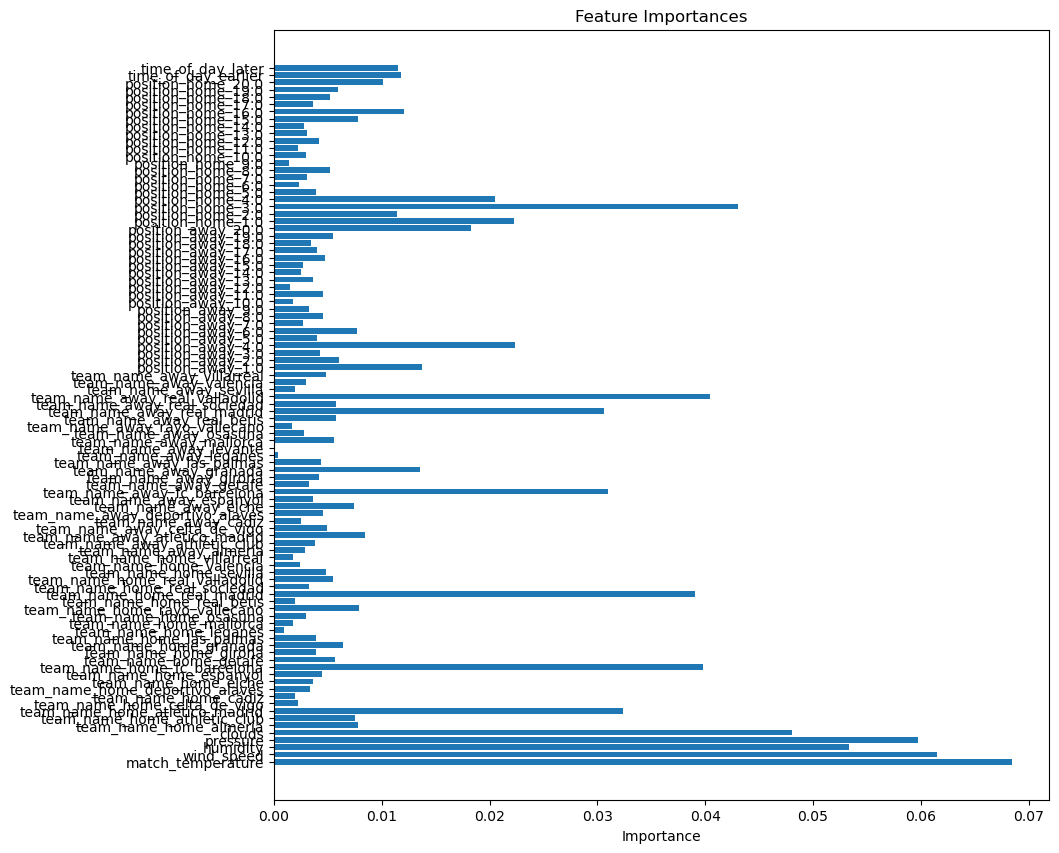

In [38]:
numeric_features = ['match_temperature', 'wind_speed',	'humidity',	'pressure',	'clouds']

categorical_features = ['team_name_home', 'team_name_away', 'position_away', 'position_home', 'time_of_day']

# Get feature importances
importances = model_rf.named_steps['classifier'].feature_importances_
# Get feature names after OneHotEncoding
feature_names = numeric_features + (model_rf.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out(categorical_features).tolist())

# Plot feature importances
plt.figure(figsize=(10, 10))
plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

### Use the Random Forest Model because feature importances are more balanced and it had a higher f1-score

In [39]:
joblib.dump(model_rf, "../src/laligamatches5ymodel_rf.pkl")

['../src/laligamatches5ymodel_rf.pkl']

In [40]:
team_goals_imp = joblib.load("../src/laligamatches5ymodel_rf.pkl")

In [41]:
team_goals_imp.predict_proba(X_test)[:,0]

c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)


array([0.64032392, 0.58162512, 0.54537142, 0.58745072, 0.49417096,
       0.673827  , 0.45998052, 0.56305104, 0.47134927, 0.51814438,
       0.52013081, 0.48373506, 0.35913213, 0.51643592, 0.47888743,
       0.53933941, 0.51806161, 0.5157333 , 0.45212006, 0.46025679,
       0.42313746, 0.64522129, 0.55847911, 0.6509212 , 0.58864743,
       0.52376697, 0.52461244, 0.66900556, 0.75502301, 0.44082594,
       0.48974281, 0.51119011, 0.37422374, 0.53939409, 0.56493802,
       0.46592217, 0.55274121, 0.37418088, 0.33062745, 0.31903907,
       0.47698959, 0.4825456 , 0.47545026, 0.57996358, 0.30846069,
       0.38555641, 0.69348937, 0.56130762, 0.61496584, 0.57285759,
       0.61398636, 0.46249198, 0.53169664, 0.58468484, 0.34842072,
       0.4708469 , 0.55499826, 0.65781929, 0.63943295, 0.47795648,
       0.56444818, 0.65501416, 0.6079405 , 0.64498044, 0.56945153,
       0.44483863, 0.56827415, 0.53089532, 0.6916769 , 0.53818563,
       0.4833486 , 0.63189617, 0.5622328 , 0.56011805, 0.66493

2025-04-20 13:59:57.207 
  command:

    streamlit run c:\Users\vchan\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

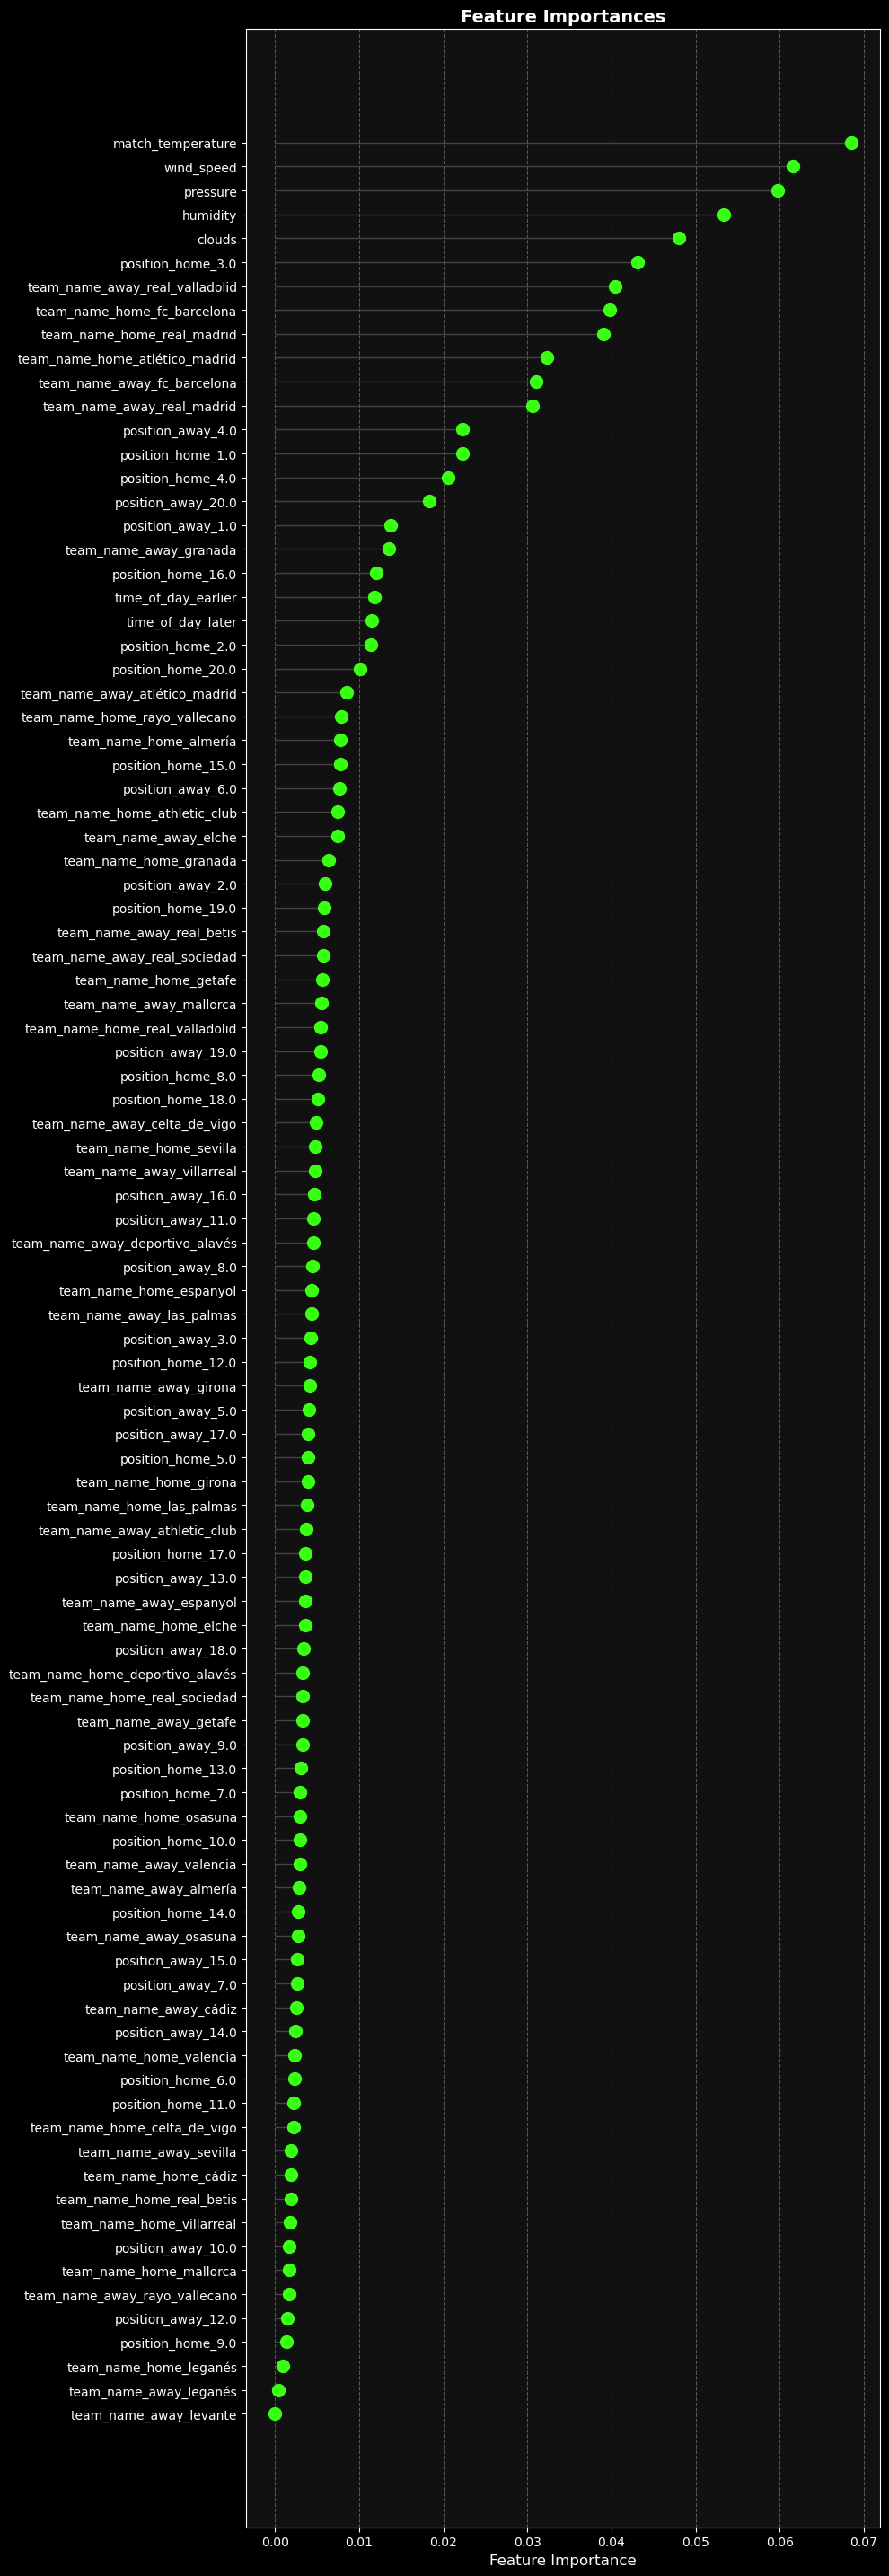

In [42]:
# Sort by importance
sorted_idx = np.argsort(importances)
sorted_importances = importances[sorted_idx]
sorted_features = [feature_names[i] for i in sorted_idx]

# Dark mode styling
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, len(sorted_features) * 0.3))
ax.set_facecolor('#111111')  # darker pitch background

# Draw lollipop chart
ax.hlines(y=sorted_features, xmin=0, xmax=sorted_importances, color='#444', linewidth=1)
ax.plot(sorted_importances, sorted_features, "o", markersize=10, color='#39ff14')  # neon green

# Axes and labels
ax.set_xlabel("Feature Importance", fontsize=12, color='white')
ax.set_title("Feature Importances", fontsize=14, color='white', weight='bold')
ax.tick_params(colors='white', labelsize=10)
ax.grid(axis='x', linestyle='--', alpha=0.3, color='white')
fig.tight_layout()

# Streamlit:
st.pyplot(fig)

In [43]:
X_train.dtypes

position_away        float64
position_home        float64
match_temperature    float64
wind_speed           float64
humidity             float64
pressure             float64
clouds               float64
team_name_home        object
team_name_away        object
time_of_day           object
dtype: object

In [44]:
list = X_train['team_name_home'].to_list()
pd.unique(list)

C:\Users\vchan\AppData\Local\Temp\ipykernel_25896\2842534036.py:2: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  pd.unique(list)


array(['FC Barcelona', 'Deportivo Alavés', 'Las Palmas', 'Real Sociedad',
       'Rayo Vallecano', 'Villarreal', 'Athletic Club', 'Celta de Vigo',
       'Real Betis', 'Almería', 'Getafe', 'Cádiz', 'Espanyol', 'Valencia',
       'Mallorca', 'Osasuna', 'Sevilla', 'Real Madrid', 'Atlético Madrid',
       'Girona', 'Elche', 'Leganés', 'Real Valladolid', 'Granada'],
      dtype=object)

In [45]:
list = X_train['team_name_away'].to_list()
pd.unique(list)

C:\Users\vchan\AppData\Local\Temp\ipykernel_25896\2177516080.py:2: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  pd.unique(list)


array(['Getafe', 'Espanyol', 'Real Betis', 'Real Madrid', 'Granada',
       'Mallorca', 'Real Sociedad', 'Villarreal', 'Athletic Club',
       'Rayo Vallecano', 'Atlético Madrid', 'Valencia', 'Sevilla',
       'Leganés', 'Las Palmas', 'Osasuna', 'Celta de Vigo',
       'Deportivo Alavés', 'Almería', 'Girona', 'Real Valladolid',
       'FC Barcelona', 'Elche', 'Cádiz', 'Levante'], dtype=object)

In [47]:
team_shortened['humidity'].max()

100.0